In [2]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as py

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [63]:
trainfile = pa.read_csv('./Training_Dataset/id_time_vitals_train.csv',
                        dtype={'ID':np.int32, 'TIME':np.int32, 'ICU':np.bool})

In [3]:
ids = trainfile['ID']
cnts = [0 for i in xrange(np.max(ids))]

for id in ids:
    cnts[id-1] += 1

NameError: name 'trainfile' is not defined

1.0 290.0


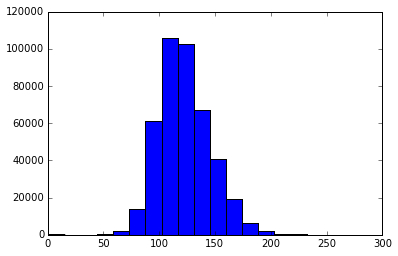

In [40]:
vals = [i for i in trainfile['V1'] if not np.isnan(i)]

print min(vals), max(vals)
_ = py.hist(vals, bins=20)

In [62]:
for row in trainfile.iterrows():
    print row[1]['V1']
    break
print trainfile.columns

86.0
Index([u'ID', u'TIME', u'V1', u'V2', u'V3', u'V4', u'V5', u'V6', u'ICU'], dtype='object')


In [4]:
vitals = pa.read_csv('Training_Dataset/id_time_vitals_train.csv',
                    dtype={'ID':np.int32, 'TIME':np.int32, 'ICU':np.int32})
labs = pa.read_csv('Training_Dataset/id_time_labs_train.csv',
                  dtype={'ID':np.int32, 'TIME':np.int32})
ages = pa.read_csv('Training_Dataset/id_age_train.csv',
                  dtype={'ID':np.int32, 'AGE':np.int32})
labels = pa.read_csv('Training_Dataset/id_label_train.csv',
                    dtype={'ID':np.int32, 'LABEL':np.int32})

In [24]:
feats = []
targets = []
win = 10

#get ids
ids = ages['ID']

tvitals = [[] for i in xrange(np.max(ids))]
tlabs = [[] for i in xrange(np.max(ids))]

for i, row in enumerate(vitals.iterrows()):
    tvitals[row[1]['ID'].astype(np.int32)].append(np.asarray(row[1][2:]))
    if i >= 3:
        break

for i, row in enumerate(labs.iterrows()):
    tlabs[row[1]['ID'].astype(np.int32)].append(np.asarray(row[1][2:]))
    if i >= 3:
        break

In [43]:
print labs[labs.ID==1][0:5]

   ID  TIME       L1          L2          L3  L4  L5         L6  L7  L8 ...   \
0   1     0      NaN         NaN         NaN NaN NaN        NaN NaN NaN ...    
1   1  4320  6.60759  114.044116  128.393872 NaN NaN  11.327002 NaN NaN ...    
2   1  5646      NaN         NaN         NaN NaN NaN        NaN NaN NaN ...    
3   1  5703      NaN         NaN         NaN NaN NaN        NaN NaN NaN ...    
4   1  6342      NaN         NaN         NaN NaN NaN        NaN NaN NaN ...    

   L16  L17  L18  L19         L20  L21  L22  L23  L24  L25  
0  NaN  NaN  NaN  NaN         NaN  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  100.206288  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN         NaN  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN         NaN  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN         NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 27 columns]


In [46]:
for id in ids:
    ivitals = tvitals[id]
    ilabs = tlabs[id]
    
    ivitals = np.asarray(ivitals)
    ilabs = np.asarray(ilabs)
    
    print ivitals.shape
    print ilabs.shape
    
    feat = [[0 for i in xrange(32)] for j in xrange(win)]
    pres = [[0 for i in xrange(32)] for j in xrange(win)]
    
    target = np.int32(labels[labels['ID'] == id]['LABEL'][0])
    print target
    
    for i in xrange(ivitals.shape[0]):
        feat = feat[1:]
        pres = pres[1:]
        
        pres.append([0 for j in xrange(32)])
        feat.append([0 for j in xrange(32)])
        
        for j in xrange(ivitals.shape[1]):
            if not np.isnan(ivitals[i][j]):
                feat[-1][j] = ivitals[i][j]
                pres[-1][j] = 1
                
        for j in xrange(ilabs.shape[1]):
            if not np.isnan(ilabs[i][j]):
                feat[-1][j+ivitals.shape[1]] = ilabs[i][j]
                pres[-1][j+ivitals.shape[1]] = 1
        
        print feat[-1]
        print pres[-1]
        
        cfeat = np.asarray(feat).flatten()
        cpres = np.asarray(pres).flatten()
        
        feats.append(np.hstack((cfeat, cpres)))
        targets.append(target)
    
    break

(4, 7)
(4, 25)
1
[86.0, 49.0, 70.0, 0, 87.0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 70.0, 0, 0, 0, 0.0, 6.6075897369599996, 114.04411609299999, 128.39387150499999, 0, 0, 11.327002096800001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100.206287769, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[91.0, 58.0, 0, 0, 0, 96.599999999999994, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[140.0, 73.0, 91.0, 32.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:

for vit, 
        